C:\Users\romab\AppData\Local\Temp\ipykernel_1924\1079904205.py:30: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  weight = (np.math.factorial(len(S)) * np.math.factorial(n - len(S) - 1)) / np.math.factorial(n)


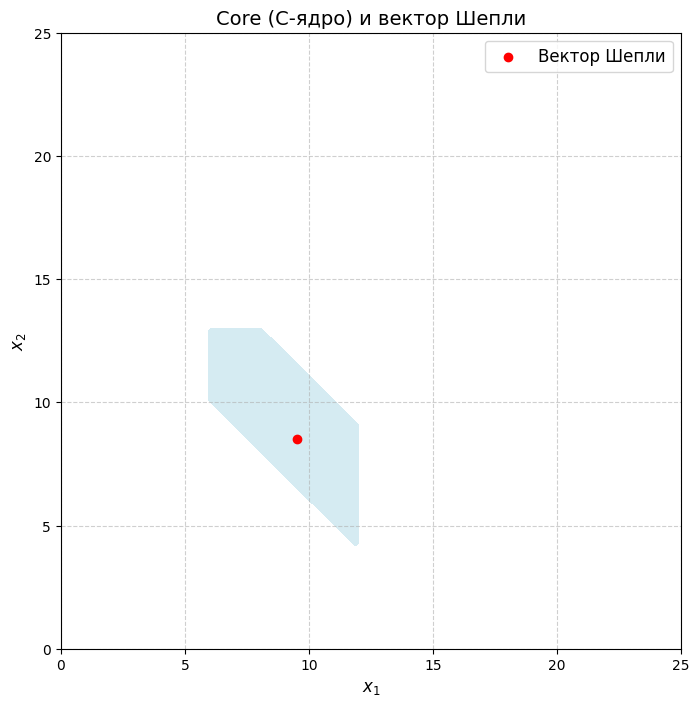

{1: 9.5, 2: 8.5, 3: 7.0}

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Данные характеристики игры
v = {
    frozenset({1}): 6,
    frozenset({2}): 3,
    frozenset({3}): 4,
    frozenset({1, 2}): 16,
    frozenset({1, 3}): 12,
    frozenset({2, 3}): 13,
    frozenset({1, 2, 3}): 25,
}

# Игроки
players = {1, 2, 3}

# Исправленная функция powerset
def powerset(iterable):
    s = list(iterable)
    return [list(combinations(s, i)) for i in range(len(s) + 1)]

# Обновленная функция расчета вектора Шепли
def shapley_value_fixed(v, players):
    n = len(players)
    phi = {i: 0 for i in players}
    for i in players:
        for S in [frozenset(S) for subset in powerset(players - {i}) for S in subset]:
            S_with_i = S | {i}
            weight = (np.math.factorial(len(S)) * np.math.factorial(n - len(S) - 1)) / np.math.factorial(n)
            phi[i] += weight * (v.get(S_with_i, 0) - v.get(S, 0))
    return phi

from itertools import combinations

# Рассчитываем вектор Шепли
phi = shapley_value_fixed(v, players)

# Рисуем C-ядро
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Core (C-ядро) и вектор Шепли", fontsize=14)
ax.set_xlabel("$x_1$", fontsize=12)
ax.set_ylabel("$x_2$", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Уравнение бюджета: x1 + x2 + x3 = v({1, 2, 3})
x1 = np.linspace(0, 25, 100)
x2 = np.linspace(0, 25, 100)
X1, X2 = np.meshgrid(x1, x2)
X3 = v[frozenset(players)] - X1 - X2

# Граничные условия C-ядра
constraints = [
    (X1 + X2 >= v[frozenset({1, 2})]),
    (X1 + X3 >= v[frozenset({1, 3})]),
    (X2 + X3 >= v[frozenset({2, 3})]),
    (X1 >= v[frozenset({1})]),
    (X2 >= v[frozenset({2})]),
    (X3 >= v[frozenset({3})]),
]

# Область C-ядра (пересечение всех ограничений)
core_region = np.logical_and.reduce(constraints) & (X3 >= 0)

# Наносим C-ядро
ax.contourf(X1, X2, core_region, levels=[0.5, 1], colors=['lightblue'], alpha=0.5)

# Наносим вектор Шепли
phi_values = list(phi.values())
ax.scatter(phi_values[0], phi_values[1], color='red', label="Вектор Шепли", zorder=5)

# Легенда
ax.legend(fontsize=12)
plt.show()

phi
